In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

In [200]:
# Load data
pandas_df = pd.read_csv('../data/curated/domain_data.csv')
pandas_df

Unnamed: 0   _c0                                                url  \
0              0     0  https://www.domain.com.au/10-allara-court-donv...   
1              1     1  https://www.domain.com.au/7-pine-ridge-donvale...   
2              2     2  https://www.domain.com.au/20-mulsanne-way-donv...   
3              3     3  https://www.domain.com.au/3-monterey-crescent-...   
4              4     4  https://www.domain.com.au/3-49-leslie-street-d...   
...          ...   ...                                                ...   
9560        9560  9810  https://www.domain.com.au/6-willansby-avenue-b...   
9561        9561  9811  https://www.domain.com.au/21-loller-street-bri...   
9562        9562  9812  https://www.domain.com.au/6-30-esplanade-brigh...   
9563        9563  9813  https://www.domain.com.au/12-trafford-ave-brig...   
9564        9564  9816  https://www.domain.com.au/3-68-70-wilson-stree...   

                  price                                   address  \
0             $1,400.00         10 Allara Court, Donvale VIC 3111   
1         $750 per week            7 Pine Ridge, Donvale VIC 3111   
2        $1300 per week         20 Mulsanne Way, Donvale VIC 3111   
3     $825pw / $3585pcm     3 Monterey Crescent, Donvale VIC 3111   
4               $680.00      3/49 Leslie Street, Donvale VIC 3111   
...                 ...                                       ...   
9560          $1,150.00     6 Willansby Avenue, Brighton VIC 3186   
9561            $670.00       21 Loller Street, Brighton VIC 3186   
9562     $1525 Per Week         6/30 Esplanade, Brighton VIC 3186   
9563     $1400 per week        12 Trafford Ave, Brighton VIC 3186   
9564            $665.00  3/68-70 Wilson Street, Brighton VIC 3186   

                property_type   latitude   longitude  Beds  Baths  ...  \
0                   Townhouse -37.774273  145.181126   4.0    3.0  ...   
1                       House -37.791251  145.175649   4.0    2.0  ...   
2                       House -37.797232  145.181264   5.0    2.0  ...   
3                       House -37.792402  145.174323   3.0    1.0  ...   
4                   Townhouse -37.781012  145.180705   3.0    2.0  ...   
...                       ...        ...         ...   ...    ...  ...   
9560                    House -37.908440  145.003618   4.0    2.0  ...   
9561                    House -37.915085  145.001300   2.0    1.0  ...   
9562                Townhouse -37.925986  144.988328   3.0    2.0  ...   
9563                    House -37.887241  144.999387   3.0    2.0  ...   
9564  Apartment / Unit / Flat -37.914112  145.002133   2.0    1.0  ...   

      sa4_code                 sa4_name  gcc_code           gcc_name  \
0          211   Melbourne - Outer East     2GMEL  Greater Melbourne   
1          211   Melbourne - Outer East     2GMEL  Greater Melbourne   
2          211   Melbourne - Outer East     2GMEL  Greater Melbourne   
3          211   Melbourne - Outer East     2GMEL  Greater Melbourne   
4          211   Melbourne - Outer East     2GMEL  Greater Melbourne   
...        ...                      ...       ...                ...   
9560       208  Melbourne - Inner South     2GMEL  Greater Melbourne   
9561       208  Melbourne - Inner South     2GMEL  Greater Melbourne   
9562       208  Melbourne - Inner South     2GMEL  Greater Melbourne   
9563       208  Melbourne - Inner South     2GMEL  Greater Melbourne   
9564       208  Melbourne - Inner South     2GMEL  Greater Melbourne   

      ste_code  ste_name  aus_code   aus_name  areasqkm  \
0            2  Victoria       AUS  Australia   20.8028   
1            2  Victoria       AUS  Australia   20.8028   
2            2  Victoria       AUS  Australia   20.8028   
3            2  Victoria       AUS  Australia   20.8028   
4            2  Victoria       AUS  Australia   20.8028   
...        ...       ...       ...        ...       ...   
9560         2  Victoria       AUS  Australia    8.2004   
9561         2  Victoria  

In [201]:
df = gpd.GeoDataFrame(pandas_df, geometry=gpd.GeoSeries.from_wkt(pandas_df['geometry']))

In [202]:
df["sa2_code"] = df["sa2_code"].astype(str)

In [203]:
print(df.shape)
df.head()

(9565, 30)


Unnamed: 0  _c0                                                url  \
0           0    0  https://www.domain.com.au/10-allara-court-donv...   
1           1    1  https://www.domain.com.au/7-pine-ridge-donvale...   
2           2    2  https://www.domain.com.au/20-mulsanne-way-donv...   
3           3    3  https://www.domain.com.au/3-monterey-crescent-...   
4           4    4  https://www.domain.com.au/3-49-leslie-street-d...   

               price                                address property_type  \
0          $1,400.00      10 Allara Court, Donvale VIC 3111     Townhouse   
1      $750 per week         7 Pine Ridge, Donvale VIC 3111         House   
2     $1300 per week      20 Mulsanne Way, Donvale VIC 3111         House   
3  $825pw / $3585pcm  3 Monterey Crescent, Donvale VIC 3111         House   
4            $680.00   3/49 Leslie Street, Donvale VIC 3111     Townhouse   

    latitude   longitude  Beds  Baths  ...  sa4_code                sa4_name  \
0 -37.774273  145.181126   4.0    3.0  ...       211  Melbourne - Outer East   
1 -37.791251  145.175649   4.0    2.0  ...       211  Melbourne - Outer East   
2 -37.797232  145.181264   5.0    2.0  ...       211  Melbourne - Outer East   
3 -37.792402  145.174323   3.0    1.0  ...       211  Melbourne - Outer East   
4 -37.781012  145.180705   3.0    2.0  ...       211  Melbourne - Outer East   

   gcc_code           gcc_name ste_code  ste_name  aus_code   aus_name  \
0     2GMEL  Greater Melbourne        2  Victoria       AUS  Australia   
1     2GMEL  Greater Melbourne        2  Victoria       AUS  Australia   
2     2GMEL  Greater Melbourne        2  Victoria       AUS  Australia   
3     2GMEL  Greater Melbourne        2  Victoria       AUS  Australia   
4     2GMEL  Greater Melbourne        2  Victoria       AUS  Australia   

   areasqkm                                           loci_uri  
0   20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...  
1   20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...  
2   20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...  
3   20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...  
4   20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...  

[5 rows x 30 columns]

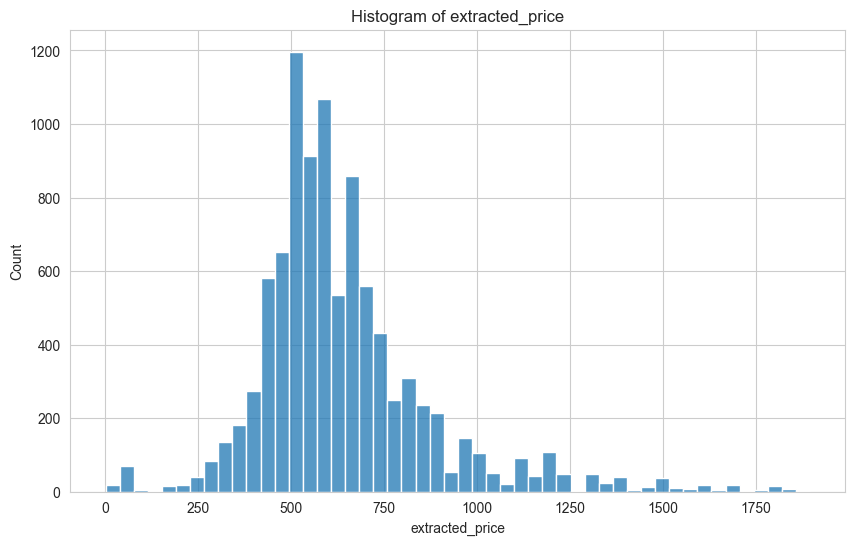

In [204]:
# Histogram of extracted_price
plt.figure(figsize=(10, 6))
sns.histplot(df['extracted_price'], bins=50)
plt.title('Histogram of extracted_price')
plt.show()

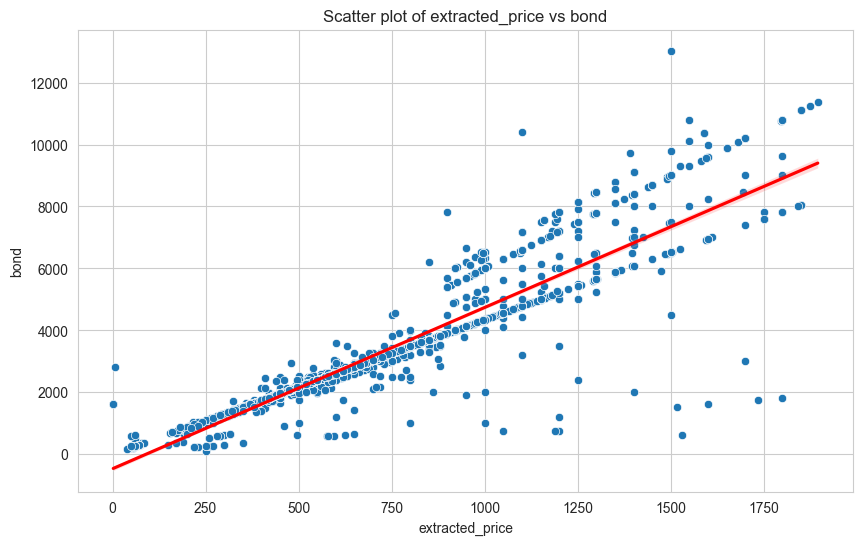

In [205]:
# Plot scatter plot of extracted_price vs bond
plt.figure(figsize=(10, 6))
sns.scatterplot(x='extracted_price', y='bond', data=df)
sns.regplot(x='extracted_price', y='bond', data=df, scatter=False, color='red')
plt.title('Scatter plot of extracted_price vs bond')
plt.show()

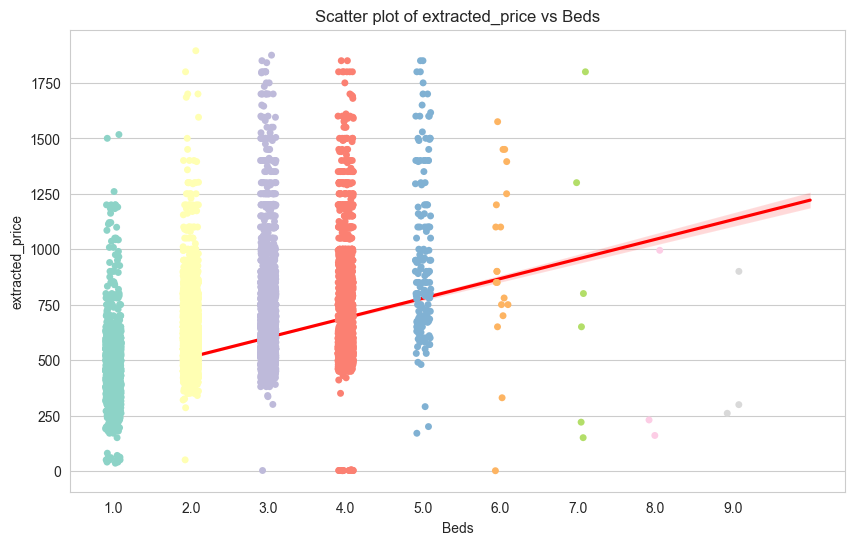

In [206]:
# Plot scatter plot of extracted_price vs Beds
plt.figure(figsize=(10, 6))
sns.stripplot(y='extracted_price', x='Beds', data=df, palette="Set3", hue='Beds', legend=False)
sns.regplot(y='extracted_price', x='Beds', data=df, scatter=False, color='red')
plt.title('Scatter plot of extracted_price vs Beds')
plt.show()

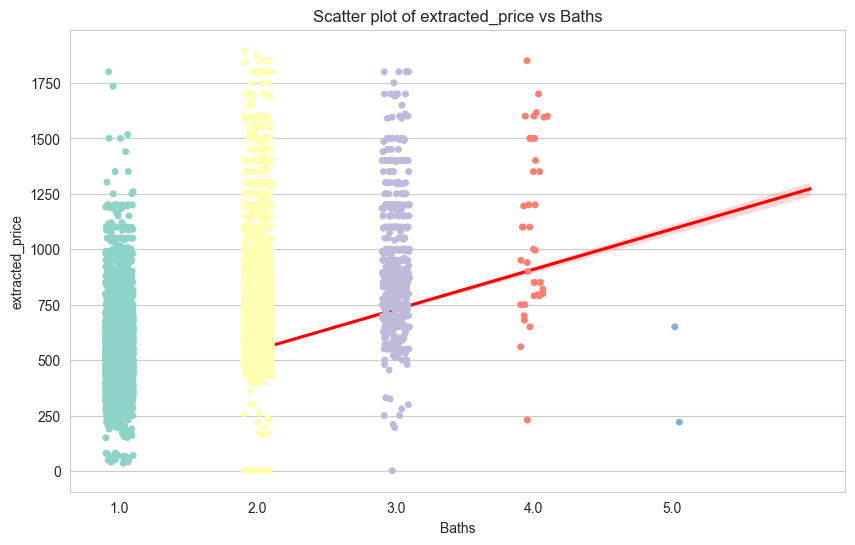

In [207]:
# Plot scatter plot of extracted_price vs Baths
plt.figure(figsize=(10, 6))
sns.stripplot(y='extracted_price', x='Baths', data=df, palette="Set3", hue='Baths', legend=False)
sns.regplot(y='extracted_price', x='Baths', data=df, scatter=False, color='red')
plt.title('Scatter plot of extracted_price vs Baths')
plt.show()

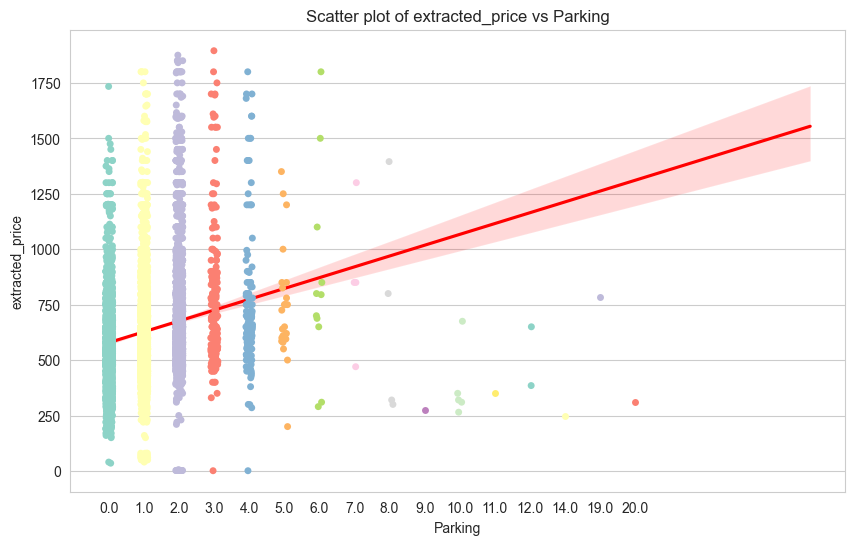

In [208]:
# Plot scatter plot of extracted_price vs Parking
plt.figure(figsize=(10, 6))
sns.stripplot(y='extracted_price', x='Parking', data=df, palette="Set3", hue='Parking', legend=False)
sns.regplot(y='extracted_price', x='Parking', data=df, scatter=False, color='red')
plt.title('Scatter plot of extracted_price vs Parking')
plt.show()

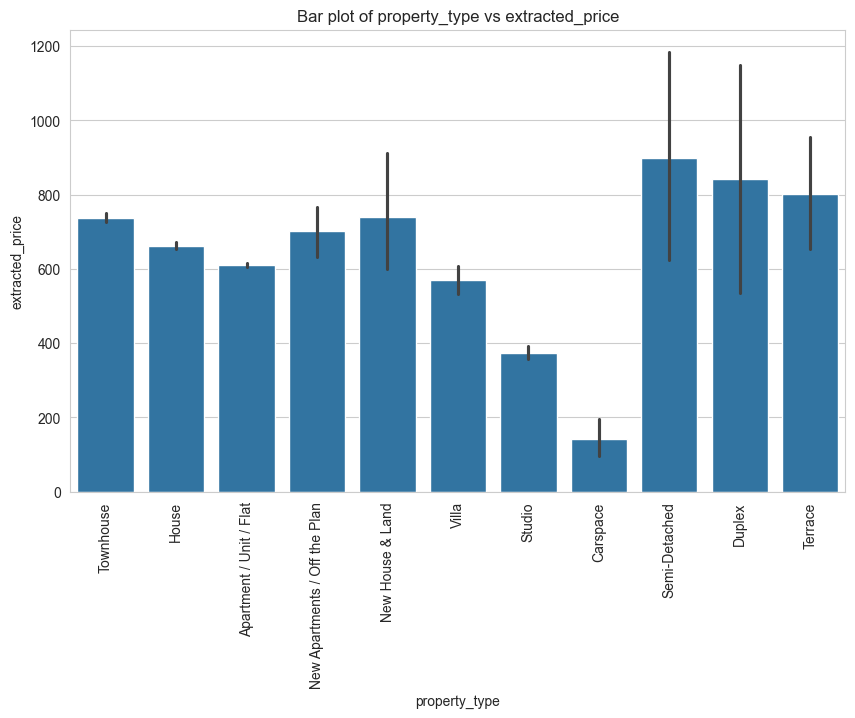

In [209]:
# bar plot of property_type vs extracted_price
plt.figure(figsize=(10, 6))
sns.barplot(x='property_type', y='extracted_price', data=df)
plt.title('Bar plot of property_type vs extracted_price')
plt.xticks(rotation=90)
plt.show()

In [210]:
df.columns

Index(['Unnamed: 0', '_c0', 'url', 'price', 'address', 'property_type',
       'latitude', 'longitude', 'Beds', 'Baths', 'Parking', 'bond',
       'extracted_price', 'geometry', 'sa2_code', 'sa2_name', 'chg_flag',
       'chg_lbl', 'sa3_code', 'sa3_name', 'sa4_code', 'sa4_name', 'gcc_code',
       'gcc_name', 'ste_code', 'ste_name', 'aus_code', 'aus_name', 'areasqkm',
       'loci_uri'],
      dtype='object')

In [211]:
# Setup for folium map plotting
sf = gpd.read_file("../data/landing/boundaries/Victoria/vic_dist_boundaries.shp")

sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

gdf = gpd.GeoDataFrame(pd.merge(df, sf, on='sa2_code', how='inner'))
gdf.head()

Unnamed: 0  _c0                                                url  \
0           0    0  https://www.domain.com.au/10-allara-court-donv...   
1           1    1  https://www.domain.com.au/7-pine-ridge-donvale...   
2           2    2  https://www.domain.com.au/20-mulsanne-way-donv...   
3           3    3  https://www.domain.com.au/3-monterey-crescent-...   
4           4    4  https://www.domain.com.au/3-49-leslie-street-d...   

               price                                address property_type  \
0          $1,400.00      10 Allara Court, Donvale VIC 3111     Townhouse   
1      $750 per week         7 Pine Ridge, Donvale VIC 3111         House   
2     $1300 per week      20 Mulsanne Way, Donvale VIC 3111         House   
3  $825pw / $3585pcm  3 Monterey Crescent, Donvale VIC 3111         House   
4            $680.00   3/49 Leslie Street, Donvale VIC 3111     Townhouse   

    latitude   longitude  Beds  Baths  ...              sa4_name_y  \
0 -37.774273  145.181126   4.0    3.0  ...  Melbourne - Outer East   
1 -37.791251  145.175649   4.0    2.0  ...  Melbourne - Outer East   
2 -37.797232  145.181264   5.0    2.0  ...  Melbourne - Outer East   
3 -37.792402  145.174323   3.0    1.0  ...  Melbourne - Outer East   
4 -37.781012  145.180705   3.0    2.0  ...  Melbourne - Outer East   

   gcc_code_y         gcc_name_y ste_code_y ste_name_y aus_code_y  aus_name_y  \
0       2GMEL  Greater Melbourne          2   Victoria        AUS   Australia   
1       2GMEL  Greater Melbourne          2   Victoria        AUS   Australia   
2       2GMEL  Greater Melbourne          2   Victoria        AUS   Australia   
3       2GMEL  Greater Melbourne          2   Victoria        AUS   Australia   
4       2GMEL  Greater Melbourne          2   Victoria        AUS   Australia   

  areasqkm_y                                         loci_uri_y  \
0    20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
1    20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
2    20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
3    20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
4    20.8028  http://linked.data.gov.au/dataset/asgsed3/SA2/...   

                                          geometry_y  
0  POLYGON ((145.17468 -37.78407, 145.17431 -37.7...  
1  POLYGON ((145.17468 -37.78407, 145.17431 -37.7...  
2  POLYGON ((145.17468 -37.78407, 145.17431 -37.7...  
3  POLYGON ((145.17468 -37.78407, 145.17431 -37.7...  
4  POLYGON ((145.17468 -37.78407, 145.17431 -37.7...  

[5 rows x 46 columns]

In [212]:
geoJSON = gdf[['sa2_code', 'geometry_y']].rename(columns={'geometry_y': 'geometry'}).drop_duplicates(
    'sa2_code').to_json()

In [216]:
df_agg = df.groupby('sa2_code').agg({
    'extracted_price': 'mean',
    '_c0': 'count'
}).reset_index()
df_agg = df_agg[df_agg['extracted_price'] < 1104]
df_agg["count"] = np.log1p(df_agg["_c0"])
df_agg.head()

sa2_code  extracted_price  _c0     count
0  206011106       618.269231   52  3.970292
1  206011107       554.000000   60  4.110874
2  206011109       668.214286   14  2.708050
3  206011495       623.604651   43  3.784190
4  206011496       604.375000   40  3.713572

In [217]:
m = folium.Map(
    location=(-37.8, 145),
    tiles="Stamen Terrain",
    zoom_start=9,
    width=500,
    height=500,
    attr="MAST30034 UniMelb",
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
)

c = folium.Choropleth(
    geo_data=geoJSON,  # geoJSON 
    name='choropleth',  # name of plot
    data=df_agg,  # data source
    columns=['sa2_code', 'count'],  # the columns required
    key_on='properties.sa2_code',  # this is from the geoJSON's properties
    fill_color="PuBuGn",  # color scheme
    nan_fill_color='black',
    fill_opacity=0.7,  # opacity of the
    line_color="white",  # line color
    line_weight=0.5,
    legend_name='Distribution of Number of Listings',  # legend name
)

c.add_to(m)

m

In [219]:
m = folium.Map(
    location=(-37.8, 145),
    tiles="Stamen Terrain",
    zoom_start=9,
    width=500,
    height=500,
    attr="MAST30034 UniMelb",
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
)

c = folium.Choropleth(
    geo_data=geoJSON,  # geoJSON 
    name='choropleth',  # name of plot
    data=df_agg,  # data source
    columns=['sa2_code', 'extracted_price'],  # the columns required
    key_on='properties.sa2_code',  # this is from the geoJSON's properties
    fill_color="PuBuGn",  # color scheme
    nan_fill_color='black',
    fill_opacity=0.7,  # opacity of the
    line_color="white",  # line color
    line_weight=0.5,
    legend_name='Distribution of Average Price',  # legend name
)

c.add_to(m)

m